# Modeling with CatBoost Classifier



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report



In [2]:
df = pd.read_csv('/Users/sabrinasayed/Documents/GitHub/Data_Center_Sites/Cleaned Data/Labeled_Data.csv', index_col=0)

In [3]:
df.head()

,City,State,Total Generation Rank,Electric Generation Rank,Commercial Generation Rank,Capacity Growth Status,CAIDI w/ Major Events,CAIDI w/o Major Events,SAIFI Major Events,Utility Annual Energy Savings (MWh),...,Utility Annual Incentive Cost ($),Utility Commercial Avg Life (Yrs),Regional Electricity Demand,IXP_Count,Total MWh Rank,Purchased Rank,County,Gigabit_Fiber_Coverage,Business_Density,Suitability
0,Anchorage,AK,Low,Low,High,Growing,138.8,137.6,High,Unknown,...,Unknown,Unknown,Moderate,1,High,Moderate,Anchorage Municipality County,Unknown,Unknown,High Suitability
1,Anchorage,AK,Low,Low,High,Growing,138.8,137.6,High,Unknown,...,Unknown,Unknown,Moderate,1,High,Moderate,Kenai Peninsula County,Unknown,Unknown,High Suitability
2,Anchorage,AK,Low,Low,High,Growing,138.8,137.6,High,Unknown,...,Unknown,Unknown,Moderate,1,High,Moderate,Kenai Peninsula Borough County,Unknown,Unknown,High Suitability
3,Montgomery,AL,High,High,Low,Growing,186.9,122.8,Moderate,Low,...,Low,Low,Low,2,Unknown,Unknown,Montgomery County,Moderate,High,High Suitability
4,Auburn,AL,High,High,Low,Growing,186.9,122.8,Moderate,Low,...,Low,Low,Low,2,Unknown,Unknown,Lee County,Unknown,Unknown,High Suitability


In [4]:
df.duplicated().sum()

2403

In [5]:
df.replace('Unknown', np.nan, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 0 to 2978
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   City                                 2979 non-null   object 
 1   State                                2979 non-null   object 
 2   Total Generation Rank                2787 non-null   object 
 3   Electric Generation Rank             2787 non-null   object 
 4   Commercial Generation Rank           2787 non-null   object 
 5   Capacity Growth Status               2787 non-null   object 
 6   CAIDI w/ Major Events                2979 non-null   float64
 7   CAIDI w/o Major Events               2979 non-null   float64
 8   SAIFI Major Events                   2979 non-null   object 
 9   Utility Annual Energy Savings (MWh)  2974 non-null   object 
 10  Utility Peak Demand Savings (MW)     2974 non-null   object 
 11  Utility Annual Incentive Cost ($)  

In [8]:
# Fill missing values using state-city grouping

df['Gigabit_Fiber_Coverage'] = df.groupby(['State', 'City'])['Gigabit_Fiber_Coverage'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['Gigabit_Fiber_Coverage'].mode()[0])
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 0 to 2978
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   City                                 2979 non-null   object 
 1   State                                2979 non-null   object 
 2   Total Generation Rank                2787 non-null   object 
 3   Electric Generation Rank             2787 non-null   object 
 4   Commercial Generation Rank           2787 non-null   object 
 5   Capacity Growth Status               2787 non-null   object 
 6   CAIDI w/ Major Events                2979 non-null   float64
 7   CAIDI w/o Major Events               2979 non-null   float64
 8   SAIFI Major Events                   2979 non-null   object 
 9   Utility Annual Energy Savings (MWh)  2974 non-null   object 
 10  Utility Peak Demand Savings (MW)     2974 non-null   object 
 11  Utility Annual Incentive Cost ($)  

In [10]:
df['Gigabit_Fiber_Coverage'].value_counts()

Gigabit_Fiber_Coverage
Good         2299
Limited       345
Excellent     180
Moderate      155
Name: count, dtype: int64

In [9]:
# Fill missing values for Business Density
df['Business_Density'] = df.groupby(['State', 'City'])['Business_Density'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['Business_Density'].mode()[0])
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 0 to 2978
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   City                                 2979 non-null   object 
 1   State                                2979 non-null   object 
 2   Total Generation Rank                2787 non-null   object 
 3   Electric Generation Rank             2787 non-null   object 
 4   Commercial Generation Rank           2787 non-null   object 
 5   Capacity Growth Status               2787 non-null   object 
 6   CAIDI w/ Major Events                2979 non-null   float64
 7   CAIDI w/o Major Events               2979 non-null   float64
 8   SAIFI Major Events                   2979 non-null   object 
 9   Utility Annual Energy Savings (MWh)  2974 non-null   object 
 10  Utility Peak Demand Savings (MW)     2974 non-null   object 
 11  Utility Annual Incentive Cost ($)  

In [12]:
df['Business_Density'].value_counts()   # all values are 'High'
# Drop Business Density, not enough useful information or variety
df.drop(columns=['Business_Density'], inplace=True)

In [13]:
# Fill missing values for Total MWh Rank
df['Total MWh Rank'] = df.groupby(['State', 'City'])['Total MWh Rank'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['Total MWh Rank'].mode()[0])
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 0 to 2978
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   City                                 2979 non-null   object 
 1   State                                2979 non-null   object 
 2   Total Generation Rank                2787 non-null   object 
 3   Electric Generation Rank             2787 non-null   object 
 4   Commercial Generation Rank           2787 non-null   object 
 5   Capacity Growth Status               2787 non-null   object 
 6   CAIDI w/ Major Events                2979 non-null   float64
 7   CAIDI w/o Major Events               2979 non-null   float64
 8   SAIFI Major Events                   2979 non-null   object 
 9   Utility Annual Energy Savings (MWh)  2974 non-null   object 
 10  Utility Peak Demand Savings (MW)     2974 non-null   object 
 11  Utility Annual Incentive Cost ($)  

In [14]:
df['Total MWh Rank'].value_counts()

Total MWh Rank
High        2946
Moderate      33
Name: count, dtype: int64

In [15]:
# Drop Purchased Rank
df.drop(columns=['Purchased Rank'], inplace=True)

In [16]:
# Fill missing values for Total Generation Rank
df['Total Generation Rank'] = df.groupby(['State', 'City'])['Total Generation Rank'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['Total Generation Rank'].mode()[0])
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 0 to 2978
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   City                                 2979 non-null   object 
 1   State                                2979 non-null   object 
 2   Total Generation Rank                2979 non-null   object 
 3   Electric Generation Rank             2787 non-null   object 
 4   Commercial Generation Rank           2787 non-null   object 
 5   Capacity Growth Status               2787 non-null   object 
 6   CAIDI w/ Major Events                2979 non-null   float64
 7   CAIDI w/o Major Events               2979 non-null   float64
 8   SAIFI Major Events                   2979 non-null   object 
 9   Utility Annual Energy Savings (MWh)  2974 non-null   object 
 10  Utility Peak Demand Savings (MW)     2974 non-null   object 
 11  Utility Annual Incentive Cost ($)  

In [17]:
# Fill missing values for Electric Generation Rank
df['Electric Generation Rank'] = df.groupby(['State', 'City'])['Electric Generation Rank'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['Electric Generation Rank'].mode()[0])
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 0 to 2978
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   City                                 2979 non-null   object 
 1   State                                2979 non-null   object 
 2   Total Generation Rank                2979 non-null   object 
 3   Electric Generation Rank             2979 non-null   object 
 4   Commercial Generation Rank           2787 non-null   object 
 5   Capacity Growth Status               2787 non-null   object 
 6   CAIDI w/ Major Events                2979 non-null   float64
 7   CAIDI w/o Major Events               2979 non-null   float64
 8   SAIFI Major Events                   2979 non-null   object 
 9   Utility Annual Energy Savings (MWh)  2974 non-null   object 
 10  Utility Peak Demand Savings (MW)     2974 non-null   object 
 11  Utility Annual Incentive Cost ($)  

In [24]:
df['Electric Generation Rank'].value_counts()

Electric Generation Rank
High        2035
Moderate     737
Low          207
Name: count, dtype: int64

In [18]:
# Fill missing values for Commercial Generation Rank
df['Commercial Generation Rank'] = df.groupby(['State', 'City'])['Commercial Generation Rank'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['Commercial Generation Rank'].mode()[0])
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 0 to 2978
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   City                                 2979 non-null   object 
 1   State                                2979 non-null   object 
 2   Total Generation Rank                2979 non-null   object 
 3   Electric Generation Rank             2979 non-null   object 
 4   Commercial Generation Rank           2979 non-null   object 
 5   Capacity Growth Status               2787 non-null   object 
 6   CAIDI w/ Major Events                2979 non-null   float64
 7   CAIDI w/o Major Events               2979 non-null   float64
 8   SAIFI Major Events                   2979 non-null   object 
 9   Utility Annual Energy Savings (MWh)  2974 non-null   object 
 10  Utility Peak Demand Savings (MW)     2974 non-null   object 
 11  Utility Annual Incentive Cost ($)  

In [23]:
df['Commercial Generation Rank'].value_counts()

Commercial Generation Rank
High        2352
Moderate     358
Low          269
Name: count, dtype: int64

In [19]:
# Fill missing values for Capacity Growth Status
df['Capacity Growth Status'] = df.groupby(['State', 'City'])['Capacity Growth Status'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['Capacity Growth Status'].mode()[0])
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 0 to 2978
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   City                                 2979 non-null   object 
 1   State                                2979 non-null   object 
 2   Total Generation Rank                2979 non-null   object 
 3   Electric Generation Rank             2979 non-null   object 
 4   Commercial Generation Rank           2979 non-null   object 
 5   Capacity Growth Status               2979 non-null   object 
 6   CAIDI w/ Major Events                2979 non-null   float64
 7   CAIDI w/o Major Events               2979 non-null   float64
 8   SAIFI Major Events                   2979 non-null   object 
 9   Utility Annual Energy Savings (MWh)  2974 non-null   object 
 10  Utility Peak Demand Savings (MW)     2974 non-null   object 
 11  Utility Annual Incentive Cost ($)  

In [22]:
df['Capacity Growth Status'].value_counts()

Capacity Growth Status
Shrinking    2111
Growing       868
Name: count, dtype: int64

In [20]:
# Fill missing values for Utility Annual Energy Savings (MWh)
df['Utility Annual Energy Savings (MWh)'] = df.groupby(['State', 'City'])['Utility Annual Energy Savings (MWh)'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['Utility Annual Energy Savings (MWh)'].mode()[0])
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 0 to 2978
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   City                                 2979 non-null   object 
 1   State                                2979 non-null   object 
 2   Total Generation Rank                2979 non-null   object 
 3   Electric Generation Rank             2979 non-null   object 
 4   Commercial Generation Rank           2979 non-null   object 
 5   Capacity Growth Status               2979 non-null   object 
 6   CAIDI w/ Major Events                2979 non-null   float64
 7   CAIDI w/o Major Events               2979 non-null   float64
 8   SAIFI Major Events                   2979 non-null   object 
 9   Utility Annual Energy Savings (MWh)  2979 non-null   object 
 10  Utility Peak Demand Savings (MW)     2974 non-null   object 
 11  Utility Annual Incentive Cost ($)  

In [21]:
df['Utility Annual Energy Savings (MWh)'].value_counts()

Utility Annual Energy Savings (MWh)
Low         1918
High         629
Moderate     432
Name: count, dtype: int64

In [29]:
# Fill missing values for Utility Annual Incentive Cost ($)
df['Utility Annual Incentive Cost ($)'] = df.groupby(['State', 'City'])['Utility Annual Incentive Cost ($)'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['Utility Annual Incentive Cost ($)'].mode()[0])
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 0 to 2978
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   City                                 2979 non-null   object 
 1   State                                2979 non-null   object 
 2   Total Generation Rank                2979 non-null   object 
 3   Electric Generation Rank             2979 non-null   object 
 4   Commercial Generation Rank           2979 non-null   object 
 5   Capacity Growth Status               2979 non-null   object 
 6   CAIDI w/ Major Events                2979 non-null   float64
 7   CAIDI w/o Major Events               2979 non-null   float64
 8   SAIFI Major Events                   2979 non-null   object 
 9   Utility Annual Energy Savings (MWh)  2979 non-null   object 
 10  Utility Peak Demand Savings (MW)     2974 non-null   object 
 11  Utility Annual Incentive Cost ($)  

In [30]:

df['Utility Annual Incentive Cost ($)'].value_counts()

Utility Annual Incentive Cost ($)
Low         1530
High         739
Moderate     710
Name: count, dtype: int64

In [31]:
# Fill missing values for Utility Commercial Avg Life (Yrs)
df['Utility Commercial Avg Life (Yrs)'] = df.groupby(['State', 'City'])['Utility Commercial Avg Life (Yrs)'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['Utility Commercial Avg Life (Yrs)'].mode()[0])
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 0 to 2978
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   City                                 2979 non-null   object 
 1   State                                2979 non-null   object 
 2   Total Generation Rank                2979 non-null   object 
 3   Electric Generation Rank             2979 non-null   object 
 4   Commercial Generation Rank           2979 non-null   object 
 5   Capacity Growth Status               2979 non-null   object 
 6   CAIDI w/ Major Events                2979 non-null   float64
 7   CAIDI w/o Major Events               2979 non-null   float64
 8   SAIFI Major Events                   2979 non-null   object 
 9   Utility Annual Energy Savings (MWh)  2979 non-null   object 
 10  Utility Peak Demand Savings (MW)     2974 non-null   object 
 11  Utility Annual Incentive Cost ($)  

In [32]:


df['Utility Commercial Avg Life (Yrs)'].value_counts()

Utility Commercial Avg Life (Yrs)
Moderate    1870
Low          952
High         157
Name: count, dtype: int64

In [33]:
# Fill missing values for Utility Peak Demand Savings (MW)
df['Utility Peak Demand Savings (MW)'] = df.groupby(['State', 'City'])['Utility Peak Demand Savings (MW)'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['Utility Peak Demand Savings (MW)'].mode()[0])
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 0 to 2978
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   City                                 2979 non-null   object 
 1   State                                2979 non-null   object 
 2   Total Generation Rank                2979 non-null   object 
 3   Electric Generation Rank             2979 non-null   object 
 4   Commercial Generation Rank           2979 non-null   object 
 5   Capacity Growth Status               2979 non-null   object 
 6   CAIDI w/ Major Events                2979 non-null   float64
 7   CAIDI w/o Major Events               2979 non-null   float64
 8   SAIFI Major Events                   2979 non-null   object 
 9   Utility Annual Energy Savings (MWh)  2979 non-null   object 
 10  Utility Peak Demand Savings (MW)     2979 non-null   object 
 11  Utility Annual Incentive Cost ($)  

In [34]:


df['Utility Peak Demand Savings (MW)'].value_counts()

Utility Peak Demand Savings (MW)
Low         2085
Moderate     591
High         303
Name: count, dtype: int64

In [25]:
# Fill missing values for Regional Electricity Demand
df['Regional Electricity Demand'] = df.groupby(['State', 'City'])['Regional Electricity Demand'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['Regional Electricity Demand'].mode()[0])
)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 0 to 2978
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   City                                 2979 non-null   object 
 1   State                                2979 non-null   object 
 2   Total Generation Rank                2979 non-null   object 
 3   Electric Generation Rank             2979 non-null   object 
 4   Commercial Generation Rank           2979 non-null   object 
 5   Capacity Growth Status               2979 non-null   object 
 6   CAIDI w/ Major Events                2979 non-null   float64
 7   CAIDI w/o Major Events               2979 non-null   float64
 8   SAIFI Major Events                   2979 non-null   object 
 9   Utility Annual Energy Savings (MWh)  2979 non-null   object 
 10  Utility Peak Demand Savings (MW)     2974 non-null   object 
 11  Utility Annual Incentive Cost ($)  

In [26]:

df['Regional Electricity Demand'].value_counts()

Regional Electricity Demand
Low         1507
Moderate    1089
High         383
Name: count, dtype: int64

In [27]:
# Drop County column - analysis and prediction will be done at state and city level
df.drop(columns=['County'], inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2979 entries, 0 to 2978
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   City                                 2979 non-null   object 
 1   State                                2979 non-null   object 
 2   Total Generation Rank                2979 non-null   object 
 3   Electric Generation Rank             2979 non-null   object 
 4   Commercial Generation Rank           2979 non-null   object 
 5   Capacity Growth Status               2979 non-null   object 
 6   CAIDI w/ Major Events                2979 non-null   float64
 7   CAIDI w/o Major Events               2979 non-null   float64
 8   SAIFI Major Events                   2979 non-null   object 
 9   Utility Annual Energy Savings (MWh)  2979 non-null   object 
 10  Utility Peak Demand Savings (MW)     2979 non-null   object 
 11  Utility Annual Incentive Cost ($)  

In [42]:
# Check for unique city and state combinations
unique_city_state = df.drop_duplicates(subset=['City', 'State'])
print(unique_city_state)

                  City State Total Generation Rank Electric Generation Rank  \
0            Anchorage    AK                   Low                      Low   
3           Montgomery    AL                  High                     High   
4               Auburn    AL                  High                     High   
7              Phoenix    AZ                  High                     High   
8            Flagstaff    AZ                  High                     High   
...                ...   ...                   ...                      ...   
2845           Seattle    WA                  High                     High   
2851           Spokane    WA                  High                     High   
2964           Madison    WI              Moderate                 Moderate   
2965         Milwaukee    WI              Moderate                 Moderate   
2978  South Charleston    WV              Moderate                 Moderate   

     Commercial Generation Rank Capacity Growth Sta

In [53]:
drop_duplicates = df.drop_duplicates(subset=['City', 'State'])

# EDA

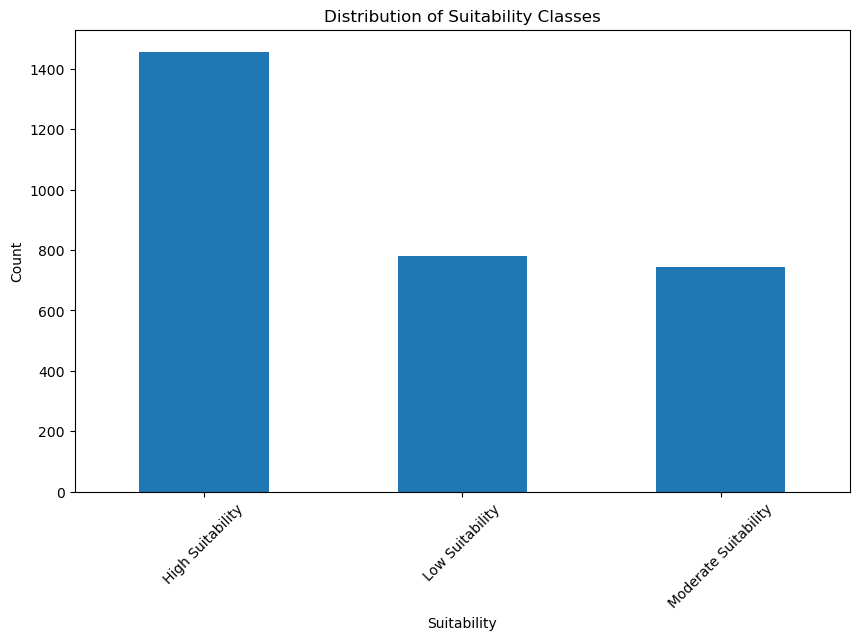


Numerical Features Summary:
       CAIDI w/ Major Events  CAIDI w/o Major Events    IXP_Count
count            2979.000000             2979.000000  2979.000000
mean              232.956026              120.133434    14.824773
std                91.941527               20.233973     8.871187
min               108.300000               84.100000     1.000000
25%               165.600000              106.100000     7.000000
50%               248.100000              119.400000    18.000000
75%               281.500000              140.000000    27.000000
max               723.500000              206.200000    27.000000


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check class distribution
plt.figure(figsize=(10, 6))
df['Suitability'].value_counts().plot(kind='bar')
plt.title('Distribution of Suitability Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Basic statistics for numerical columns
print("\nNumerical Features Summary:")
print(df.describe())

# Building the Model: CatBoost Classifier

In [54]:


X = drop_duplicates.drop(columns=['Suitability'])
y = drop_duplicates['Suitability']
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

for col in categorical_features:
    X[col] = X[col].astype('str')
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
model = CatBoostClassifier(iterations=100, 
                           depth=5, 
                           learning_rate=0.1, 
                           loss_function='MultiClass',
                           cat_features=categorical_features,
                           verbose=False,
                           l2_leaf_reg=3,  # Add L2 regularization
                           random_strength=1  # Add randomization to split selection
                           )

model.fit(X_train, y_train)

In [56]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print("Average CV score:", cv_scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Average CV score: 1.0


In [47]:


# Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


                      precision    recall  f1-score   support

    High Suitability       1.00      1.00      1.00       279
     Low Suitability       1.00      1.00      1.00       172
Moderate Suitability       1.00      1.00      1.00       145

            accuracy                           1.00       596
           macro avg       1.00      1.00      1.00       596
        weighted avg       1.00      1.00      1.00       596



In [48]:
# Check feature importance after model training
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
                                feature  importance
14                            IXP_Count   67.308118
13          Regional Electricity Demand   21.616124
7                CAIDI w/o Major Events    6.918488
6                 CAIDI w/ Major Events    3.207366
3              Electric Generation Rank    0.291831
16               Gigabit_Fiber_Coverage    0.141112
4            Commercial Generation Rank    0.111469
9   Utility Annual Energy Savings (MWh)    0.108658
5                Capacity Growth Status    0.086382
12    Utility Commercial Avg Life (Yrs)    0.052533
2                 Total Generation Rank    0.052058
10     Utility Peak Demand Savings (MW)    0.040078
8                    SAIFI Major Events    0.027546
11    Utility Annual Incentive Cost ($)    0.025665
15                       Total MWh Rank    0.012572
1                                 State    0.000000
0                                  City    0.000000
